<a href="https://colab.research.google.com/github/Himanshucode77/Case_Study/blob/main/walmart_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brief Summary**
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# **Problem Statement**
Analyze the Walmart data and generate insights that could help Walmart to identify the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. Also investigate the below:-
    1) whether the spending habits differ between male and female customers. 
    2) women spend more on Black Friday than men?

We can start with observation of the data, missing value detection & statistical summary to get some broader insights from the features. Do some Non-Graphical Analysis(i.e. Value counts and unique attributes) & Visual Analysis -(i.e. Univariate, Bivariate). Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

# Common Utilities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [ ]:
def missingValue(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    tab = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return tab

In [ ]:
def detectoutlier(df,colname):
    Q3 = df[colname].quantile(0.75)
    Q1 = df[colname].quantile(0.25)
    IQR = Q3-Q1
    outlier_left = Q1 - (1.5 * IQR)
    outlier_right = Q3 + (1.5 * IQR)

    return df[(df[colname]<= outlier_left) | (df[colname] >= outlier_right)]

In [ ]:
def removeoutlier(df,colname):
    Q3 = df[colname].quantile(0.75)
    Q1 = df[colname].quantile(0.25)
    IQR = Q3-Q1
    outlier_left = Q1 - (1.5 * IQR)
    outlier_right = Q3 + (1.5 * IQR)

    return df[(df[colname]> outlier_left) & (df[colname] < outlier_right)]

In [ ]:
def distplot(df,colname,title,axis):
    axis.set_title(title, fontweight="bold")
    sns.distplot(df[colname],ax=axis)
    axis.axvline(df[colname].mean(), color='r', linestyle='--', label="Mean")
    axis.axvline(df[colname].median(), color='g', linestyle='-', label="Median")
    axis.axvline(df[colname].mode()[0], color='m', linestyle='-', label="Mode")
    axis.legend({'Mean':df[colname].mean(),'Median':df[colname].median(),'Mode':df[colname].mode()})

In [ ]:
def boxplot_bicol(df,colname1, colname2,axis):    
    sns.boxplot(x = colname1,y = colname2, data = df,ax=axis,palette="Paired")
    axis.set_xlabel(colname1, fontweight="bold",fontsize=14,family = "Comic Sans MS")
    axis.set_ylabel(colname2, fontweight="bold", fontsize=14,family = "Comic Sans MS")

In [ ]:
def boxplot(df,colname,title,axis):
    axis.set_title(title, fontweight="bold")
    plt.ylabel(colname, fontsize=12,family = "Comic Sans MS")
    sns.boxplot(y = df[colname],ax=axis)

In [ ]:
def pieplot(df,colname,axis):
    palette_color = sns.color_palette("ch:s=.25,rot=-.25")
    df_count = df[colname].value_counts()
    df_count.plot.pie(colors = palette_color,autopct='%.0f%%',ax=axis)  

In [ ]:
def barplot(df,colname,axis):
    xlbl = colname
    ylbl = "Frequency of " + colname + " (%)"
    palette_color = sns.color_palette("ch:s=.25,rot=-.25")
    df_count = df[colname].value_counts()
    df_count.plot.bar(color=palette_color,ax=axis)
    axis.set_xlabel(xlbl) 
    axis.set_ylabel(ylbl) 

In [ ]:
def countplot(df, xcolname, hcolname, axis):
    title = xcolname + " - " + hcolname + " based distribution"
    sns.countplot(data=df,x=xcolname, hue=hcolname, palette="Set2",ax=axis)
    axis.set_title(title,fontweight="bold")
    axis.set_xlabel(xcolname)  
    axis.set_ylabel('count')

In [ ]:
def pointplot(df,colname1,colname2,colname3,title,axis):
    sns.pointplot(x=df[colname1],y=df[colname2],hue=df[colname3],ax=axis) 
    axis.set_xlabel(colname1) 
    axis.set_ylabel(colname2)
    axis.set_title(title,fontweight="bold")

In [ ]:
def plot_male_female(df,colname,axis):
    sns.barplot(colname,"Purchase",data=df,hue="Gender",palette=sns.color_palette("ch:s=.25,rot=-.25"))
    axis.set_xlabel(colname) 
    axis.set_ylabel("Purchase")
    axis.set_title("Male/Female vs " + colname + " Per Transaction",fontweight="bold")

In [ ]:
def calculateCI(sample,smp_size,trial_size,confidence_level):
    smp_mean = np.empty(trial_size)
    smp1 = np.empty(smp_size)
    
    for i in range(trial_size):
        smp1 = np.random.choice(sample, size = smp_size,replace=True)
        smp_mean[i] = np.mean(smp1)
        
    #Calcualte the Z-Critical value
    ## for 99%, it is 1-.01/2
    z_value = stats.norm.ppf(1 - (1-confidence_level)/2)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_mean)
    sigma = np.std(smp_mean,ddof=1) ## sample mean - divided by n-1
    sem   = stats.sem(smp_mean)  ##sigma/sqrt(smp_size)
    
    lower_limit = mean - (z_value * sigma)
    upper_limit = mean + (z_value * sigma)
        
    return smp_mean,np.round(mean,2), np.round(sigma,2), np.round(lower_limit,2), np.round(upper_limit,2),np.round(upper_limit-lower_limit,2)

In [ ]:
def CI_kdeplot(df,confidence_interval ):
    df = df['Purchase']
    
    trial_size = 1000
    sample_sizes = [5, 10, 25, 500, 1000, 100000]
    
    resarr = np.empty((0,7))
    
    for n in sample_sizes:
        sample_means, mean, sigma, lower_limit, upper_limit,rnge = calculateCI(df,n,trial_size,confidence_interval)
        
        resarr = np.append(resarr, np.array([[n,confidence_interval, mean, sigma, lower_limit, upper_limit,rnge]]), axis=0)
        
        fig, ax = plt.subplots(figsize=(7,6))
        sns.set_style("darkgrid")
        
        sns.kdeplot(data=sample_means,shade=True, palette="deep",linewidth=2)
    
        lbl_mean=("Mean ")
        lbl_limit=("Lower Limit\nUpper Limit")
    
        plt.title(f"Sample Size: {n}",fontsize=14,family = "Comic Sans MS")
        plt.xlabel('Purchase')
        plt.axvline(mean, color = 'g', linestyle = 'solid', linewidth = 2,label=lbl_mean)
        plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=lbl_limit)
        plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
        plt.legend(loc='upper right')
        plt.show()
        
    return resarr

In [ ]:
def CI_kdeplot_gender(df,confidence_interval ):
    df_male = df[df['Gender'] == 'M']['Purchase']
    df_female = df[df['Gender'] == 'F']['Purchase']
    
    trial_size = 1000
    sample_sizes = [5, 10, 25, 500, 1000, 100000]
    
    resarr = np.empty((0,8))
    
    for n in sample_sizes:
        male_sample_means, male_mean, male_sigma, male_lower_limit, male_upper_limit,male_rnge = calculateCI(df_male,n,trial_size,confidence_interval)
        female_sample_means, female_mean, female_sigma, female_lower_limit, female_upper_limit,female_rnge = calculateCI(df_female,n,trial_size,confidence_interval)
        
        resarr = np.append(resarr, np.array([['Male', n, confidence_interval, male_mean, male_sigma, male_lower_limit, male_upper_limit,male_rnge]]), axis=0)
        resarr = np.append(resarr, np.array([['Female', n, confidence_interval, female_mean, female_sigma, female_lower_limit, female_upper_limit,female_rnge]]), axis=0)
        
        fig, ax = plt.subplots(figsize=(14,6))
        sns.set_style("darkgrid")
        
        sns.kdeplot(data=male_sample_means,shade=True, palette="deep",linewidth=2)
        sns.kdeplot(data=female_sample_means,shade=True, palette="deep",linewidth=2)
    
        lbl_male_mean=("Mean (M)")
        lbl_male_limit=("Lower Limit(M)\nUpper Limit(M)")
        lbl_female_mean=("Mean (F)")
        lbl_female_limit=("Lower Limit(F):\nUpper Limit(F)")
    
        plt.title(f"Sample Size: {n}",fontsize=14,family = "Comic Sans MS")
        plt.xlabel('Purchase')
        plt.axvline(male_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=lbl_male_mean)
        plt.axvline(male_upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=lbl_male_limit)
        plt.axvline(male_lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
        plt.axvline(female_mean, color = 'b', linestyle = 'dashdot', linewidth = 2,label=lbl_female_mean)
        plt.axvline(female_upper_limit, color = 'y', linestyle = 'dashdot', linewidth = 2,label=lbl_female_limit)
        plt.axvline(female_lower_limit, color = 'y', linestyle = 'dashdot', linewidth = 2)
        plt.legend(loc='upper right')
        plt.show()
        
    return resarr

In [ ]:
def CI_kdeplot_maritalstatus(df,confidence_interval ):
    df_single = df[df['Marital_Status'] == 0]['Purchase']
    df_married = df[df['Marital_Status'] == 1]['Purchase']
    
    trial_size = 1000
    sample_sizes = [5, 10, 25, 500, 1000, 100000]
    
    resarr = np.empty((0,8))
    
    for n in sample_sizes:
        single_sample_means, single_mean, single_sigma, single_lower_limit, single_upper_limit,single_rnge = calculateCI(df_single,n,trial_size,confidence_interval)
        married_sample_means, married_mean, married_sigma, married_lower_limit, married_upper_limit,married_rnge = calculateCI(df_married,n,trial_size,confidence_interval)
        
        resarr = np.append(resarr, np.array([['Single', n, confidence_interval, single_mean, single_sigma, single_lower_limit, single_upper_limit,single_rnge]]), axis=0)
        resarr = np.append(resarr, np.array([['Married', n, confidence_interval, married_mean, married_sigma, married_lower_limit, married_upper_limit,married_rnge]]), axis=0)
        
        fig, ax = plt.subplots(figsize=(14,6))
        sns.set_style("darkgrid")
        
        sns.kdeplot(data=single_sample_means,shade=True, palette="deep",linewidth=2)
        sns.kdeplot(data=married_sample_means,shade=True, palette="deep",linewidth=2)
    
        lbl_single_mean=("Mean (S)")
        lbl_single_limit=("Lower Limit(S)\nUpper Limit(S)")
        lbl_married_mean=("Mean (M)")
        lbl_married_limit=("Lower Limit(M):\nUpper Limit(M)")
    
        plt.title(f"Sample Size: {n}",fontsize=14,family = "Comic Sans MS")
        plt.xlabel('Purchase')
        plt.axvline(single_mean, color = 'g', linestyle = 'solid', linewidth = 2,label=lbl_single_mean)
        plt.axvline(single_upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=lbl_single_limit)
        plt.axvline(single_lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
        plt.axvline(married_mean, color = 'b', linestyle = 'dashdot', linewidth = 2,label=lbl_married_mean)
        plt.axvline(married_upper_limit, color = 'y', linestyle = 'dashdot', linewidth = 2,label=lbl_married_limit)
        plt.axvline(married_lower_limit, color = 'y', linestyle = 'dashdot', linewidth = 2)
        plt.legend(loc='upper right')
        plt.show()
        
    return resarr

In [ ]:
def CI_kdeplot_age(df,confidence_interval ):
    trial_size = 1000
    sample_sizes = [500, 1000, 100000]
    agegrp =['0-17', '18-25', '26-35', '36-50', '51+'] 

    clrs = ['b','g','r','c','m','y','k']
    
    df.replace('36-45','36-50',inplace=True)
    df.replace('46-50','36-50',inplace=True)
    df.replace('51-55','51+',inplace=True)
    df.replace('55+','51+',inplace=True)

    resarr = np.empty((0,8))
    
    for n in sample_sizes:
        i = 0
        fig, ax = plt.subplots(figsize=(14,6))
        sns.set_style("darkgrid")
        
        for age in agegrp:
            sample_means, mean, sigma, lower_limit, upper_limit,rnge = calculateCI(df[df['Age'] == age]['Purchase'],n,trial_size,confidence_interval)
        
            resarr = np.append(resarr, np.array([[age, n, confidence_interval, mean, sigma, lower_limit, upper_limit,rnge]]), axis=0)
            sns.kdeplot(data=sample_means,shade=True, palette="deep",linewidth=2)
    
            lbl_mean="Mean (" + age + ")"
            lbl_limit="Lower Limit(" + age +")\nUpper Limit(" + age + ")"
            plt.axvline(mean, color = clrs[i], linestyle = 'solid', linewidth = 2,label=lbl_mean)
            plt.axvline(upper_limit, color = clrs[i], linestyle = 'dashdot', linewidth = 2,label=lbl_limit)
            plt.axvline(lower_limit, color = clrs[i], linestyle = 'dashdot', linewidth = 2)
            
            i += 1
    
        plt.title(f"Sample Size: {n}",fontsize=14,family = "Comic Sans MS")
        plt.xlabel('Purchase')
        plt.legend(loc='upper right')
        plt.show()
        
    return resarr

## Read Walmart data

In [ ]:
walmart_data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
walmart_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Observations on the shape of data, data types of all the attributes

### Shape : ( rows, cols )

In [ ]:
walmart_data.shape

(550068, 10)

## Attribute Names

In [ ]:
walmart_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## Datatype of all attributes

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Analyzing basic statistics about each feature, such as count, min, max, and mean

In [ ]:
walmart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
walmart_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
walmart_data.groupby(['Gender'])['User_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,1.003130e+06,1786.630589,1000001.0,1001569.0,1003159.0,1004765.0,1006039.0
M,414259.0,1.002996e+06,1706.493873,1000002.0,1001505.0,1003041.0,1004411.0,1006040.0


In [ ]:
walmart_data.groupby(['Age'])['User_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,1.002722e+06,1776.554949,1000001.0,1001263.0,1002137.0,1004493.0,1006006.0
18-25,99660.0,1.002801e+06,1732.153875,1000018.0,1001314.0,1002854.0,1004217.0,1006031.0
26-35,219587.0,1.003113e+06,1732.500251,1000003.0,1001599.0,1003243.0,1004524.0,1006040.0
36-45,110013.0,1.003066e+06,1689.592749,1000007.0,1001598.0,1003050.0,1004488.0,1006026.0
46-50,45701.0,1.003190e+06,1777.321193,1000004.0,1001798.0,1003430.0,1004661.0,1006039.0
51-55,38501.0,1.002985e+06,1680.562531,1000006.0,1001591.0,1002878.0,1004373.0,1006033.0
55+,21504.0,1.002986e+06,1659.540611,1000002.0,1001739.0,1002661.0,1004193.0,1006038.0


In [ ]:
walmart_data.groupby(['Occupation'])['User_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,1.003001e+06,1746.166191,1000014.0,1001517.0,1003067.0,1004462.0,1006039.0
1,47426.0,1.003349e+06,1910.035939,1000007.0,1001695.0,1003477.0,1005205.0,1006038.0
2,26588.0,1.003162e+06,1761.605058,1000050.0,1001489.0,1003371.0,1004948.0,1005945.0
3,17650.0,1.002540e+06,1660.623294,1000018.0,1001022.0,1002293.0,1004041.0,1005983.0
4,72308.0,1.002959e+06,1658.081096,1000025.0,1001561.0,1003004.0,1004387.0,1006028.0
5,12177.0,1.003405e+06,1434.638942,1000067.0,1002456.0,1003557.0,1004437.0,1006005.0
6,20355.0,1.003263e+06,1629.215361,1000128.0,1001899.0,1003610.0,1004784.0,1006040.0
7,59133.0,1.003093e+06,1696.290502,1000004.0,1001633.0,1003238.0,1004452.0,1006032.0
8,1546.0,1.002031e+06,1737.777030,1000042.0,1000550.0,1001736.0,1003836.0,1005287.0


In [ ]:
walmart_data.groupby(['City_Category'])['User_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,1.002942e+06,1791.615533,1000001.0,1001255.0,1002986.0,1004508.0,1006034.0
B,231173.0,1.003069e+06,1684.741781,1000004.0,1001671.0,1003129.0,1004446.0,1006040.0
C,171175.0,1.003050e+06,1725.825426,1000002.0,1001561.0,1003119.0,1004503.0,1006038.0


In [ ]:
walmart_data.groupby(['Marital_Status'])['User_ID'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,1.002999e+06,1700.465995,1000001.0,1001524.0,1003065.0,1004386.0,1006040.0
1,225337.0,1.003071e+06,1765.090842,1000004.0,1001506.0,1003093.0,1004647.0,1006039.0


In [ ]:
walmart_data.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
walmart_data.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
walmart_data.groupby(['Occupation'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


In [ ]:
walmart_data.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [ ]:
walmart_data.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


### Inference
There are more single people than married people.
More customers are between the age group : 26 - 35.
The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
Male customers tend to spend more than female customers, as the mean is higher for male customers.

# Non-Graphical Analysis: Value counts and unique attributes

## Unique values (counts) for each Feature

In [ ]:
for colname in walmart_data.columns:
    l = len(colname)
    if l<7:
        print(colname,'\t\t\t\t:',walmart_data[colname].nunique())
    elif l==16:
        print(colname,'\t\t:',walmart_data[colname].nunique())
    elif l<16:
        print(colname,'\t\t\t:',walmart_data[colname].nunique())
    else:
        print(colname,'\t:',walmart_data[colname].nunique())

User_ID 			: 5891
Product_ID 			: 3631
Gender 				: 2
Age 				: 7
Occupation 			: 21
City_Category 			: 3
Stay_In_Current_City_Years 	: 5
Marital_Status 			: 2
Product_Category 		: 20
Purchase 			: 18105


### Inference
* Totally there are 3631 products which belongs to 20 different product categories
* The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products.
* Both male and female customers does shopping
* Both single and married customers does shopping
* 3 City customers are available

## Unique values (names) are checked for each Features

In [ ]:
cols = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
for colname in cols:
    print("\nUnique values of ",colname," are : ",list(walmart_data[colname].unique()))


Unique values of  Gender  are :  ['F', 'M']

Unique values of  Age  are :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Unique values of  Occupation  are :  [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]

Unique values of  City_Category  are :  ['A', 'C', 'B']

Unique values of  Stay_In_Current_City_Years  are :  ['2', '4+', '3', '1', '0']

Unique values of  Marital_Status  are :  [0, 1]

Unique values of  Product_Category  are :  [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]


### Inference
* No abnormalities found.

## Unique values (counts) are checked for each Features unique values

In [ ]:
walmart_data["User_ID"].value_counts().sort_values(ascending=False)

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
walmart_data["Gender"].value_counts().sort_values(ascending=False)

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
walmart_data["Age"].value_counts().sort_values(ascending=False)

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
walmart_data["Occupation"].value_counts().sort_values(ascending=False)

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
walmart_data["City_Category"].value_counts().sort_values(ascending=False)

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
walmart_data["Stay_In_Current_City_Years"].value_counts().sort_values(ascending=False)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
walmart_data["Marital_Status"].value_counts().sort_values(ascending=False)

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
walmart_data["Product_Category"].value_counts().sort_values(ascending=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

## Deep dive into customers

In [ ]:
walmart_data.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
walmart_data.groupby(['Gender'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

Gender
F    0.282804
M    0.717196
Name: User_ID, dtype: float64

Inference
* 72% of customers are male whereas 28% are female customers

In [ ]:
walmart_data.groupby(['Age'])['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
walmart_data.groupby(['Age'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

Age
0-17     0.037006
18-25    0.181463
26-35    0.348498
36-45    0.198099
46-50    0.090137
51-55    0.081650
55+      0.063147
Name: User_ID, dtype: float64

Inference
* 34% of customers belongs to 26-35 age group
* 19% of customers belongs to 36-45 age group
* 18% of customers belongs to 18-25 age group

In [ ]:
walmart_data.groupby(['Occupation'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

Occupation
0     0.116788
1     0.087761
2     0.043456
3     0.028858
4     0.125615
5     0.018842
6     0.038703
7     0.113563
8     0.002886
9     0.014938
10    0.032592
11    0.021728
12    0.063826
13    0.023765
14    0.049907
15    0.023765
16    0.039891
17    0.083347
18    0.011373
19    0.012052
20    0.046342
Name: User_ID, dtype: float64

Inference
* 11% of customers have 0 education
* 11% of customers have education 7 level
* 12% of customers have education 4 level

In [ ]:
walmart_data.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [ ]:
walmart_data.groupby(['City_Category'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

City_Category
A    0.177389
B    0.289764
C    0.532847
Name: User_ID, dtype: float64

Inference
* 34% of customers belongs to 26-35 age group
* 19% of customers belongs to 36-45 age group
* 18% of customers belongs to 18-25 age group

In [ ]:
walmart_data.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

Stay_In_Current_City_Years
0     0.131047
1     0.354099
2     0.194364
3     0.166186
4+    0.154303
Name: User_ID, dtype: float64

Inference
* 35% of customers stays in current city "1"
* 19% of customers stays in current city "2"
* 16% of customers stays in current city "3"

In [ ]:
walmart_data.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [ ]:
walmart_data.groupby(['Marital_Status'])['User_ID'].nunique()/walmart_data["User_ID"].nunique()

Marital_Status
0    0.580037
1    0.419963
Name: User_ID, dtype: float64

### Inference
* 58% are married customers

## Deep dive into purchase

In [ ]:
walmart_data.groupby(['Gender'])['Purchase'].nunique()

Gender
F    14704
M    17547
Name: Purchase, dtype: int64

Inference
* Male customers tend to spend more than female customers

In [ ]:
walmart_data.groupby(['Age'])['Purchase'].nunique()

Age
0-17      7701
18-25    13869
26-35    15927
36-45    14458
46-50    11526
51-55    10869
55+       8446
Name: Purchase, dtype: int64

Inference
* Most Customers are between the ages of 26 and 35.
* The 2nd highest spending age group is 36-45

In [ ]:
walmart_data.groupby(['Occupation'])['Purchase'].nunique()

Occupation
0     12942
1     11505
2      9474
3      7892
4     12915
5      6608
6      8411
7     12205
8      1412
9      4165
10     7094
11     6410
12    10187
13     4797
14     9472
15     6571
16     9349
17    10979
18     4570
19     5397
20    10610
Name: Purchase, dtype: int64

Inference
* Not much inference with the Occupation

In [ ]:
walmart_data.groupby(['City_Category'])['Purchase'].nunique()

City_Category
A    15160
B    16284
C    15514
Name: Purchase, dtype: int64

Inference
* Majority of customers come from City Category B tend to purchase more than other category group customers

In [ ]:
walmart_data.groupby(['Stay_In_Current_City_Years'])['Purchase'].nunique()

Stay_In_Current_City_Years
0     13184
1     15835
2     14085
3     13957
4+    13584
Name: Purchase, dtype: int64

In [ ]:
walmart_data.groupby(['Marital_Status'])['Purchase'].nunique()

Marital_Status
0    16942
1    16225
Name: Purchase, dtype: int64

### Inference
* Single customers purchase more than married customers.

## Missing values in every column of dataset

In [ ]:
missingValue(walmart_data)

Total records =  550068


,Total Missing,In Percent
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category,0,0.0
Purchase,0,0.0


### Inference
* No missing value found.

## Validating Duplicate Records

In [ ]:
walmart_data.loc[walmart_data.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


### Inference
* No duplicates found.

# Data prep for exploration

## Conversion of Categorical attributes

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Inference
* Product_ID, Gender, Age, Occupation, City_Category and Marital_Status are categorial variables.

In [ ]:
cols = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']
for colname in cols:
    walmart_data[colname] = walmart_data[colname].astype("category")

In [ ]:
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 19.9+ MB


## Visual Univariate Analysis - Numerical Variables

###Outliers Detection

#### Purchase

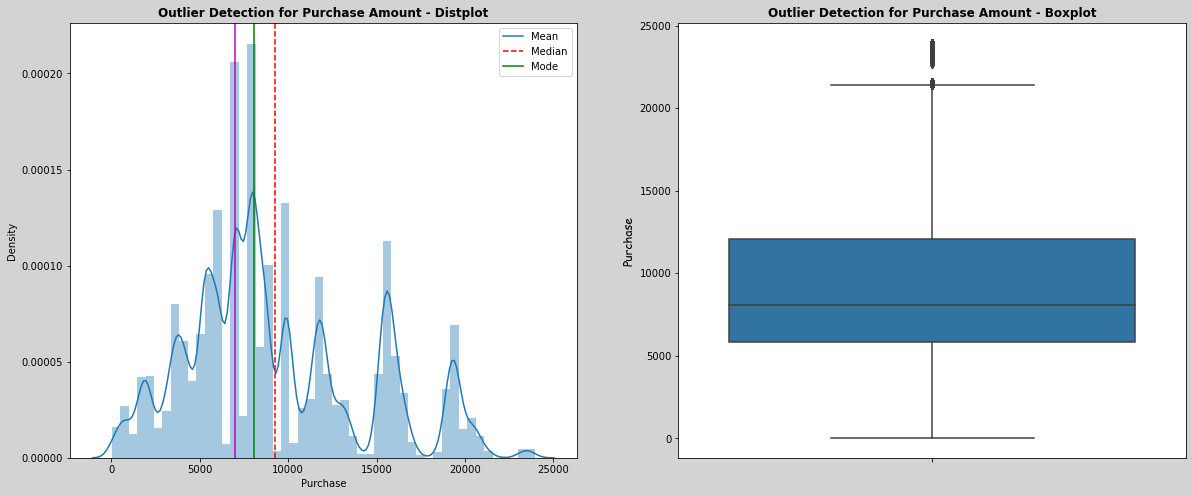

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(20,8))
fig.set_facecolor("lightgrey")

distplot(walmart_data,"Purchase","Outlier Detection for Purchase Amount - Distplot",ax[0])
boxplot(walmart_data,"Purchase","Outlier Detection for Purchase Amount - Boxplot",ax[1])

plt.show()

Inference
* Above displot clearly says, data is  right-skewed which means the mass of the distribution is concentrated on the left of the figure.
* Majority of Customers purchase within the 5,000 - 20,000 range.

In [ ]:
detectoutlier(walmart_data,"Purchase")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
walmart_data_v1 = removeoutlier(walmart_data,"Purchase")
walmart_data_v1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


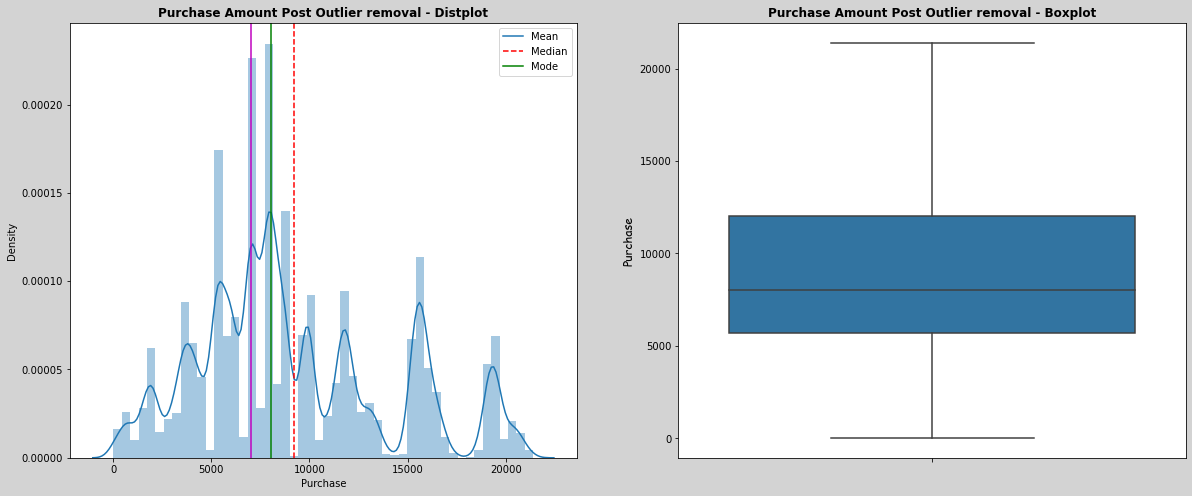

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(20,8))
fig.set_facecolor("lightgrey")

distplot(walmart_data_v1,"Purchase","Purchase Amount Post Outlier removal - Distplot",ax[0])
boxplot(walmart_data_v1,"Purchase","Purchase Amount Post Outlier removal - Boxplot",ax[1])

plt.show()

## Visual Univariate Analysis - Categorical Variables

In [ ]:
walmart_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     547391 non-null  int64   
 1   Product_ID                  547391 non-null  object  
 2   Gender                      547391 non-null  category
 3   Age                         547391 non-null  category
 4   Occupation                  547391 non-null  category
 5   City_Category               547391 non-null  category
 6   Stay_In_Current_City_Years  547391 non-null  category
 7   Marital_Status              547391 non-null  category
 8   Product_Category            547391 non-null  int64   
 9   Purchase                    547391 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 24.0+ MB


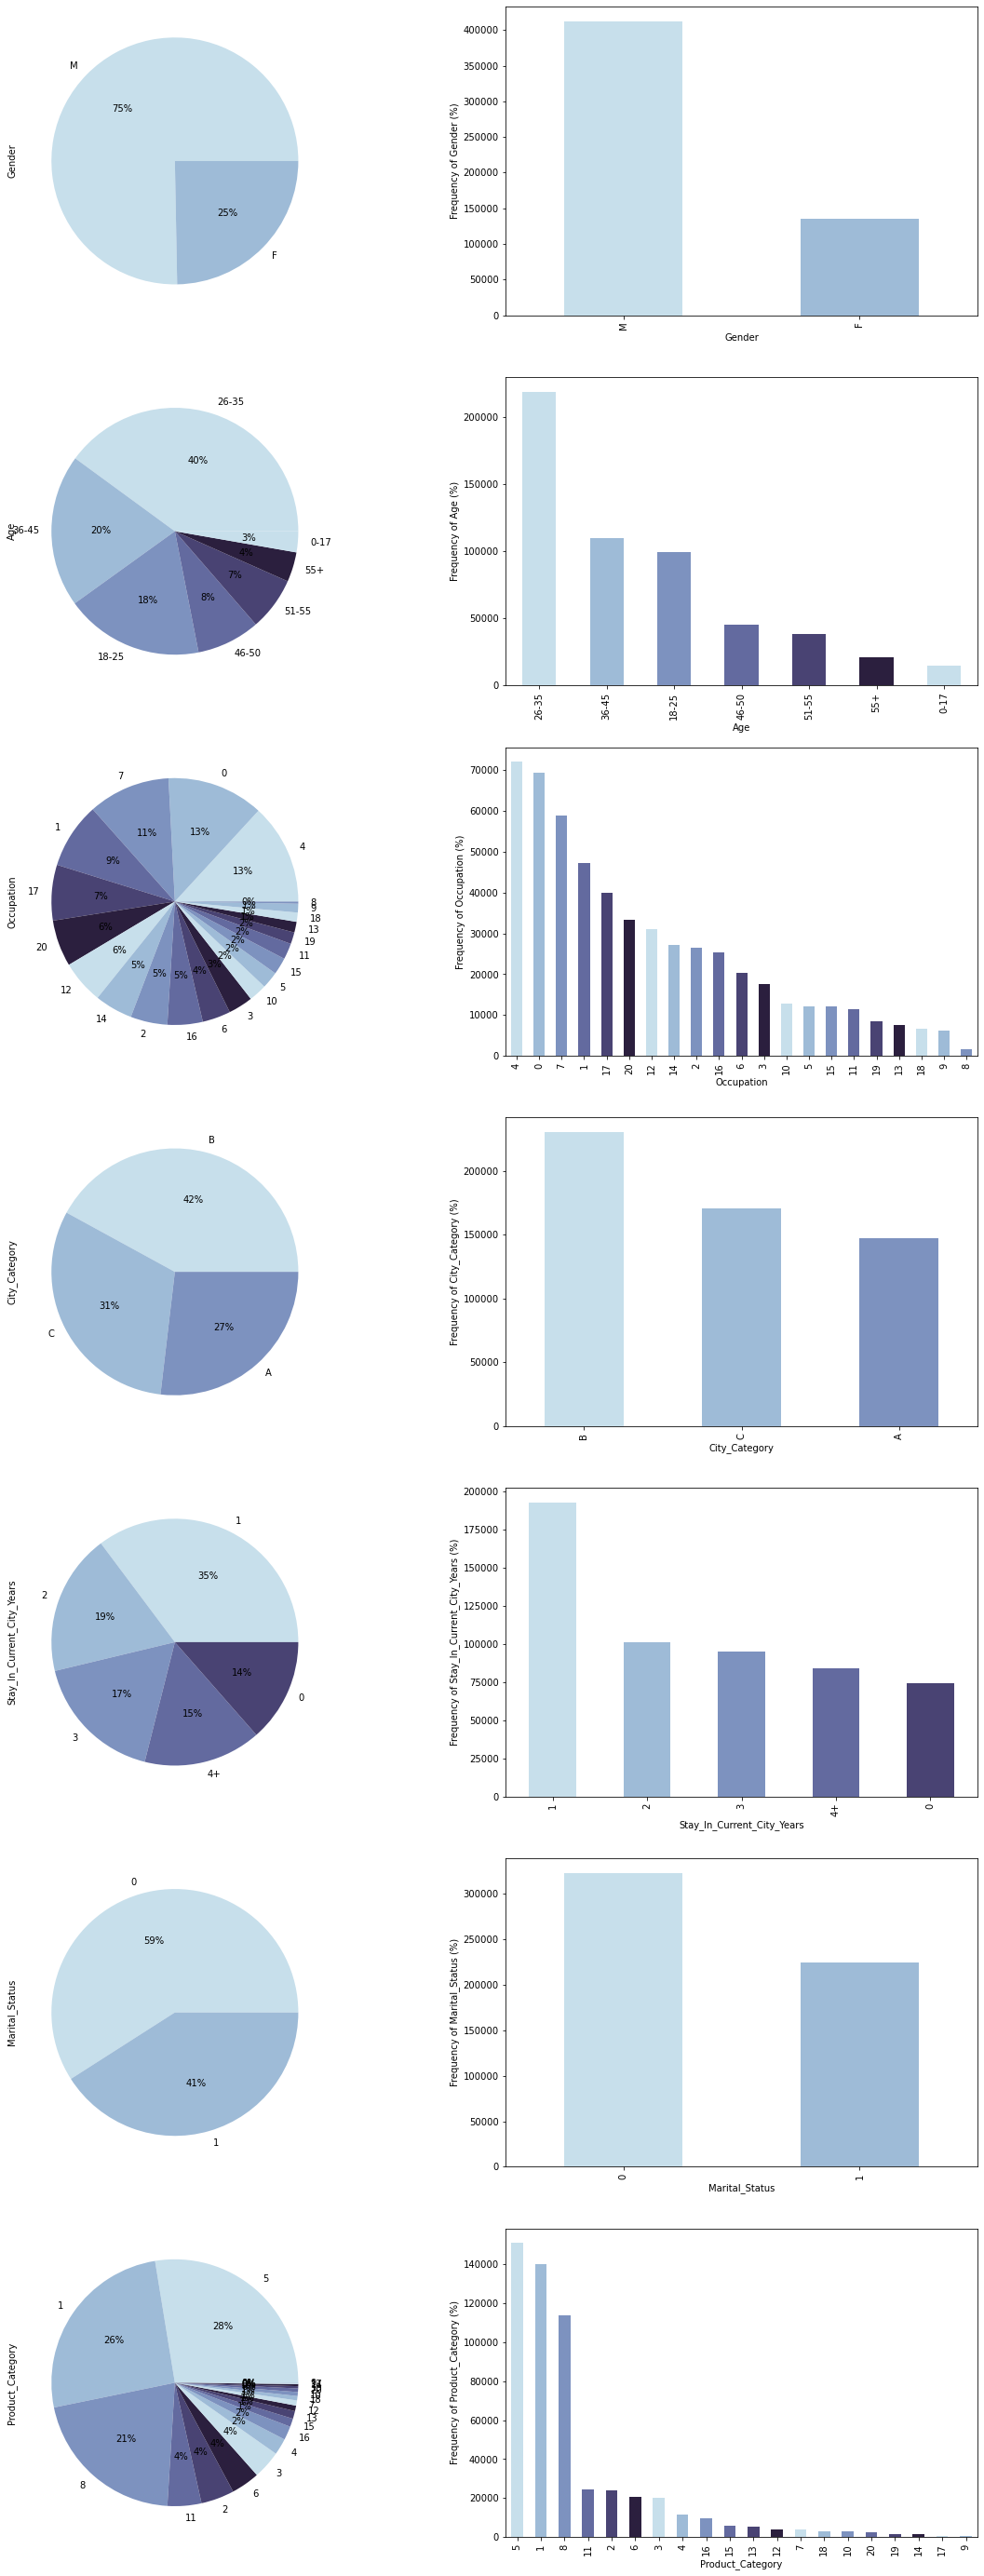

In [ ]:
fig , ax = plt.subplots(7,2,figsize=(20,50))  
fig.set_facecolor(color = 'white')

pieplot(walmart_data_v1,"Gender",ax[0][0])
barplot(walmart_data_v1,"Gender",ax[0][1])

pieplot(walmart_data_v1,"Age",ax[1][0])
barplot(walmart_data_v1,"Age",ax[1][1])

pieplot(walmart_data_v1,"Occupation",ax[2][0])
barplot(walmart_data_v1,"Occupation",ax[2][1])

pieplot(walmart_data_v1,"City_Category",ax[3][0])
barplot(walmart_data_v1,"City_Category",ax[3][1])

pieplot(walmart_data_v1,"Stay_In_Current_City_Years",ax[4][0])
barplot(walmart_data_v1,"Stay_In_Current_City_Years",ax[4][1])

pieplot(walmart_data_v1,"Marital_Status",ax[5][0])
barplot(walmart_data_v1,"Marital_Status",ax[5][1])

pieplot(walmart_data_v1,"Product_Category",ax[6][0])
barplot(walmart_data_v1,"Product_Category",ax[6][1])

plt.show()

Inference
* Male customers purchase more than females. 75% of men and only 25% of women purchase products.
* 60% of purchases are made by people between the ages of 26 and 45
* 42% customers are from City Category B, whereas 31% are from City Category C 31% and 27% are from City Category A of all customer purchases.
* only 15% of the customers stays in the same city for more than 4 years.
* Single customers purchase more than married. 59% of single and 41% of married customers purchase products.

## Visual Bivariate Analysis - Numerical Variables

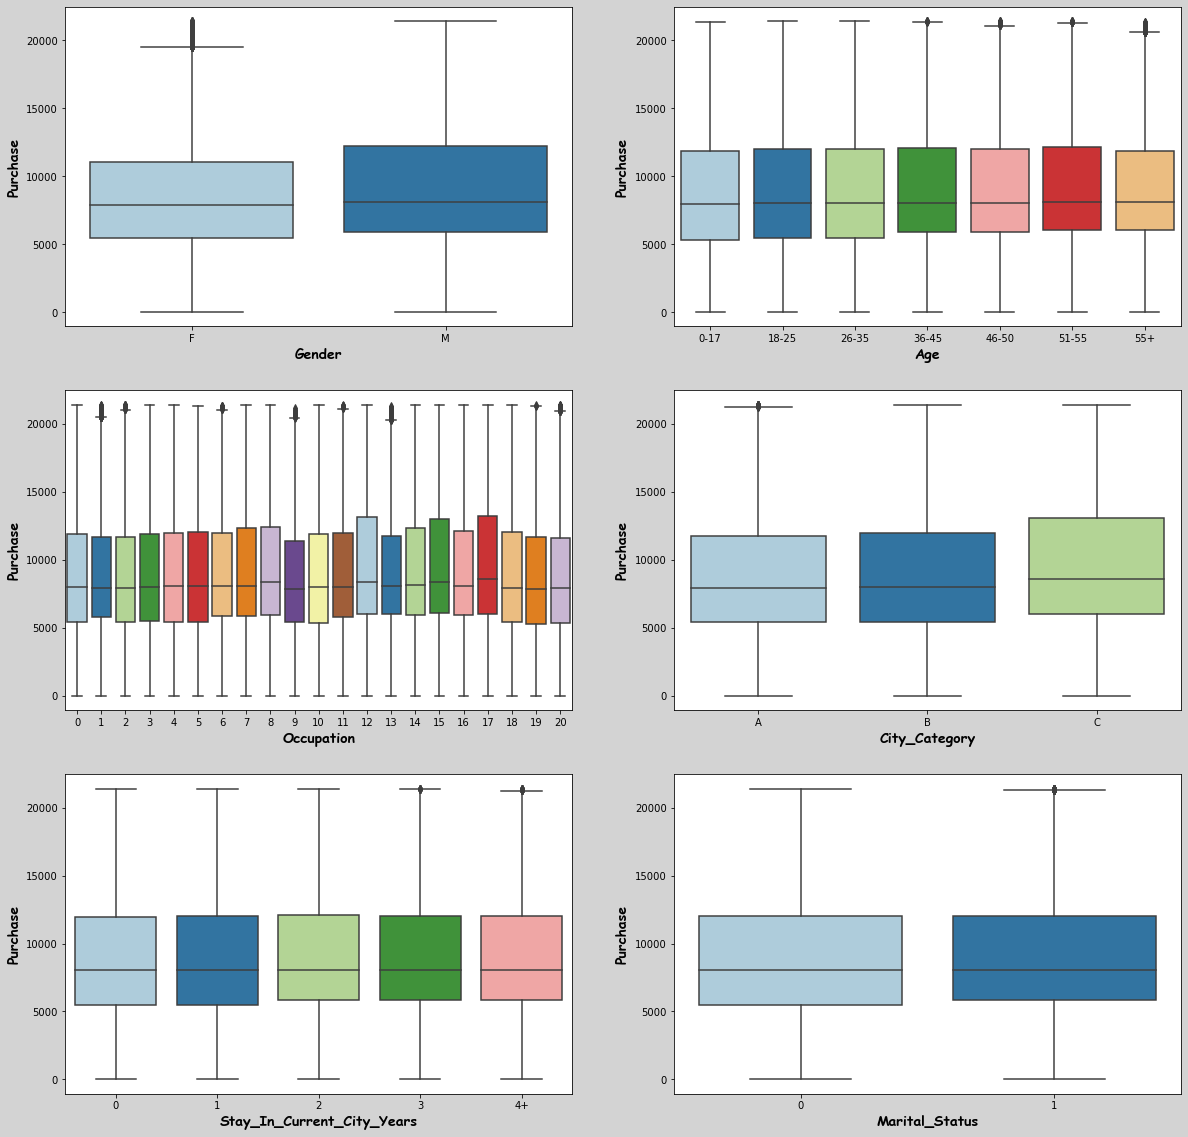

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))
fig.set_facecolor("lightgrey")

boxplot_bicol(walmart_data_v1,"Gender","Purchase",ax[0][0])
boxplot_bicol(walmart_data_v1,"Age","Purchase",ax[0][1])

boxplot_bicol(walmart_data_v1,"Occupation","Purchase",ax[1][0])
boxplot_bicol(walmart_data_v1,"City_Category","Purchase",ax[1][1])

boxplot_bicol(walmart_data_v1,"Stay_In_Current_City_Years","Purchase",ax[2][0])
boxplot_bicol(walmart_data_v1,"Marital_Status","Purchase",ax[2][1])

plt.show()

### Are women spending more money per transaction than men? Why or Why not?

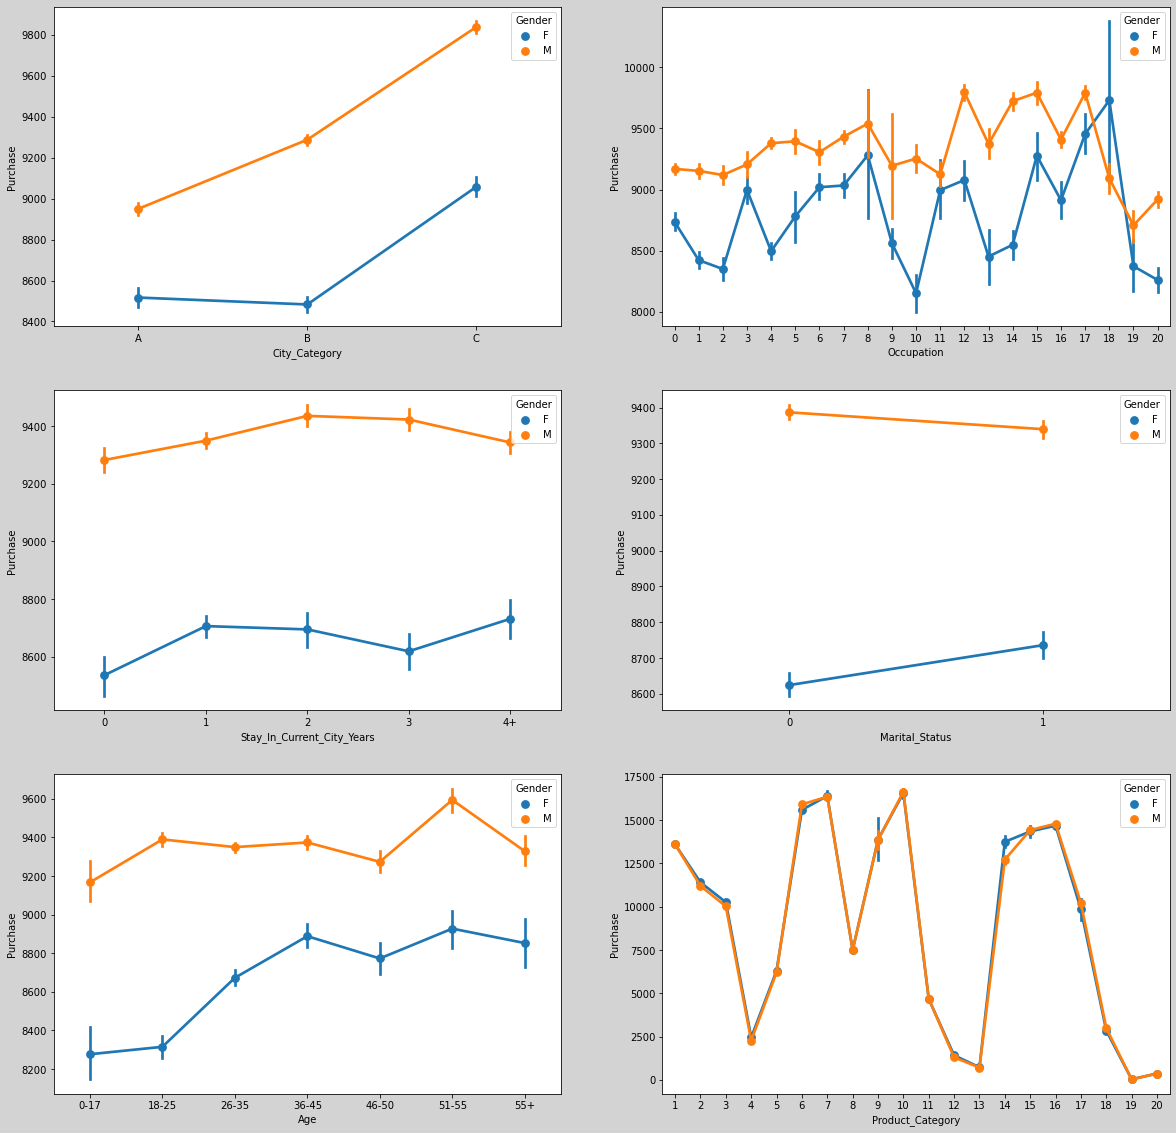

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))
fig.set_facecolor("lightgrey")

pointplot(walmart_data_v1,"City_Category","Purchase","Gender","",ax[0][0])
pointplot(walmart_data_v1,"Occupation","Purchase","Gender","",ax[0][1])

pointplot(walmart_data_v1,"Stay_In_Current_City_Years","Purchase","Gender","",ax[1][0])
pointplot(walmart_data_v1,"Marital_Status","Purchase","Gender","",ax[1][1])

pointplot(walmart_data_v1,"Age","Purchase","Gender","",ax[2][0])
pointplot(walmart_data_v1,"Product_Category","Purchase","Gender","",ax[2][1])

plt.show()

In [ ]:
walmart_male = walmart_data_v1[walmart_data_v1['Gender'] == 'M']['Purchase']
walmart_female = walmart_data_v1[walmart_data_v1['Gender'] == 'F']['Purchase']

print("Total Customers : ",walmart_data_v1.shape[0])
print("Male Customers : ",walmart_male.shape[0])
print("Female Customers : ",walmart_female.shape[0])

Total Customers :  547391
Male Customers :  412171
Female Customers :  135220


Inference
* Male customers purchase more than females. 75% of men and only 25% of women purchase products.
* The amount of money spent by women is less than that spent by men
* In City Category C, there are slightly more female customers.
* Occupation 19 female customers spend more than male customers
* Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

### Are married people spending more money per transaction than unmarried? Why or Why not?

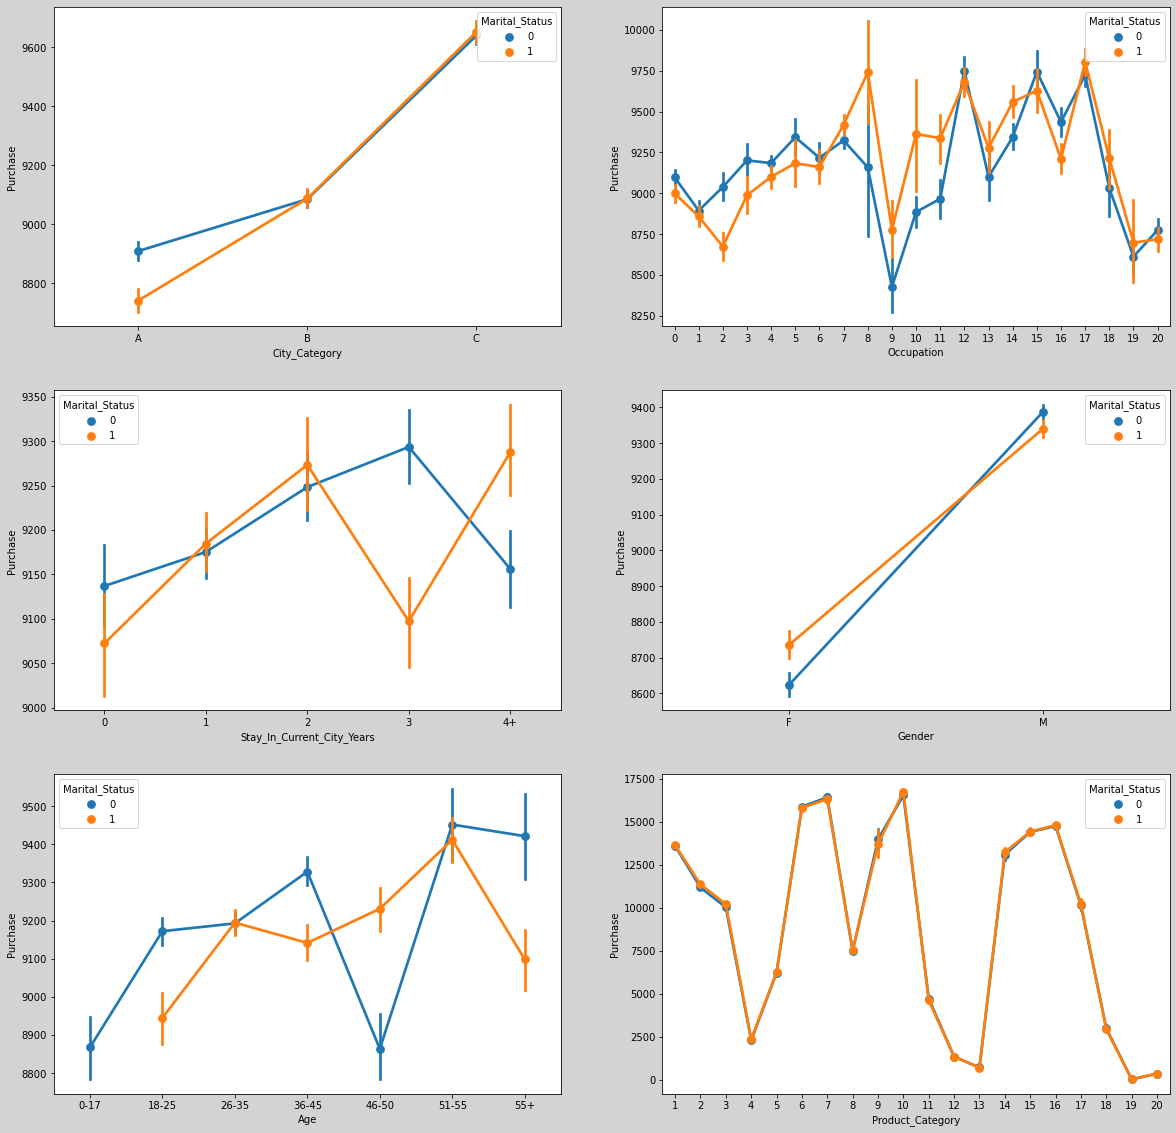

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))
fig.set_facecolor("lightgrey")

pointplot(walmart_data_v1,"City_Category","Purchase","Marital_Status","",ax[0][0])
pointplot(walmart_data_v1,"Occupation","Purchase","Marital_Status","",ax[0][1])

pointplot(walmart_data_v1,"Stay_In_Current_City_Years","Purchase","Marital_Status","",ax[1][0])
pointplot(walmart_data_v1,"Gender","Purchase","Marital_Status","",ax[1][1])

pointplot(walmart_data_v1,"Age","Purchase","Marital_Status","",ax[2][0])
pointplot(walmart_data_v1,"Product_Category","Purchase","Marital_Status","",ax[2][1])

plt.show()

Inference
* Male customers purchase more than females.
* 60% of purchases are made by people between the ages of 26 and 45
* 42% customers are from City Category B, whereas 31% are from City Category C 31% and 27% are from City Category A of all customer purchases.
* only 15% of the customers stays in the same city for more than 4 years.
* Single customers purchase more than married.

###Correlation

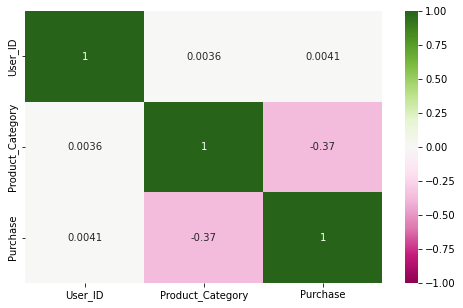

In [ ]:
plt.figure(figsize = (8, 5))
sns.color_palette("pastel")
sns.heatmap(walmart_data_v1.corr(), annot=True, vmin=-1, vmax = 1,cmap="PiYG") 
plt.show()

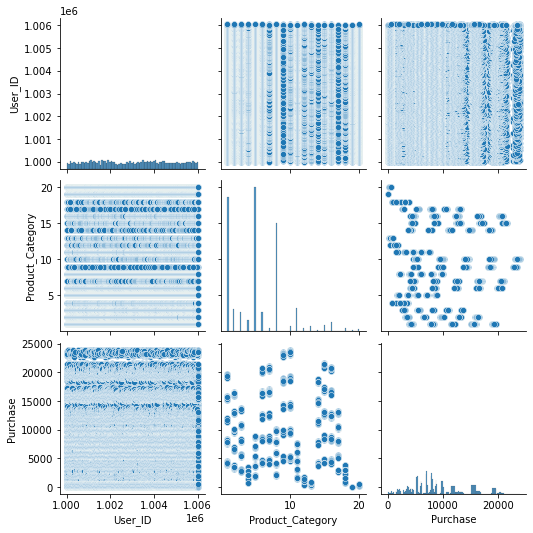

In [ ]:
sns.color_palette("pastel")
sns.pairplot(walmart_data)
plt.show()

Inference
* Most of the features are categorical so there is not much correlation observed

## Visual Bivariate Analysis - Categorical Variables

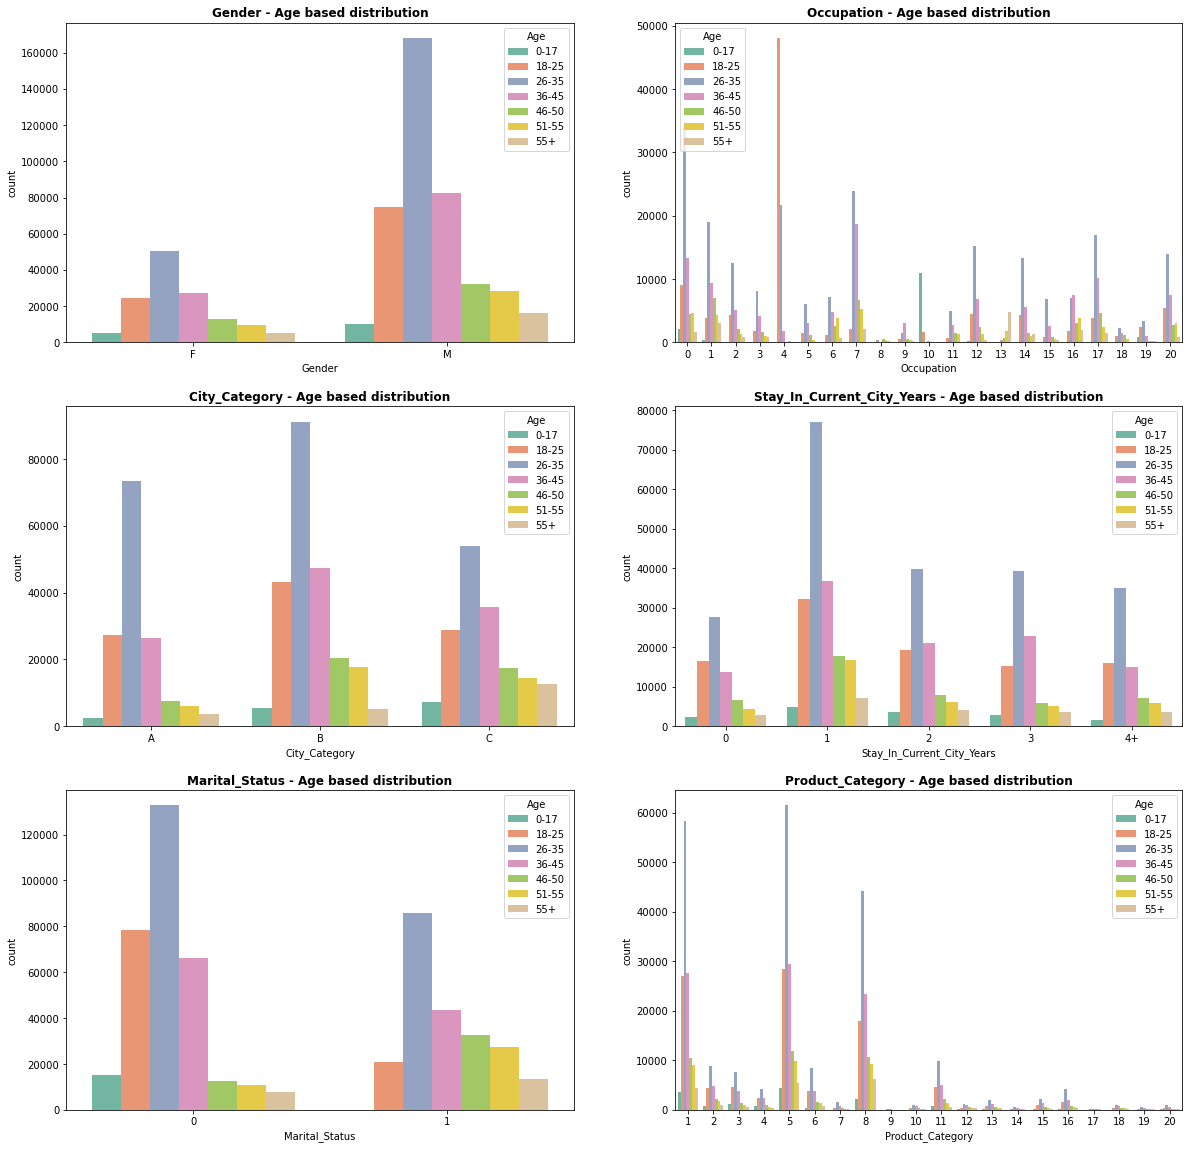

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))

countplot(walmart_data_v1,"Gender","Age",ax[0][0])
countplot(walmart_data_v1,"Occupation","Age", ax[0][1])

countplot(walmart_data_v1,"City_Category","Age",ax[1][0])
countplot(walmart_data_v1,"Stay_In_Current_City_Years","Age", ax[1][1])

countplot(walmart_data_v1,"Marital_Status","Age",ax[2][0])
countplot(walmart_data_v1,"Product_Category","Age", ax[2][1])

plt.show()

Inference
* Most of the male customers are from 26-35 age group
* Most of the customers who stays in same city for more than 4 years belongs to 26-35 age group
* All the 3 city categories have customers within the age group 26-35
* Most of the Single customers are frrom 26-35 age group
* Most selling product category - 1,5, 8 and 11 are purchased by customers within the age group 26-35

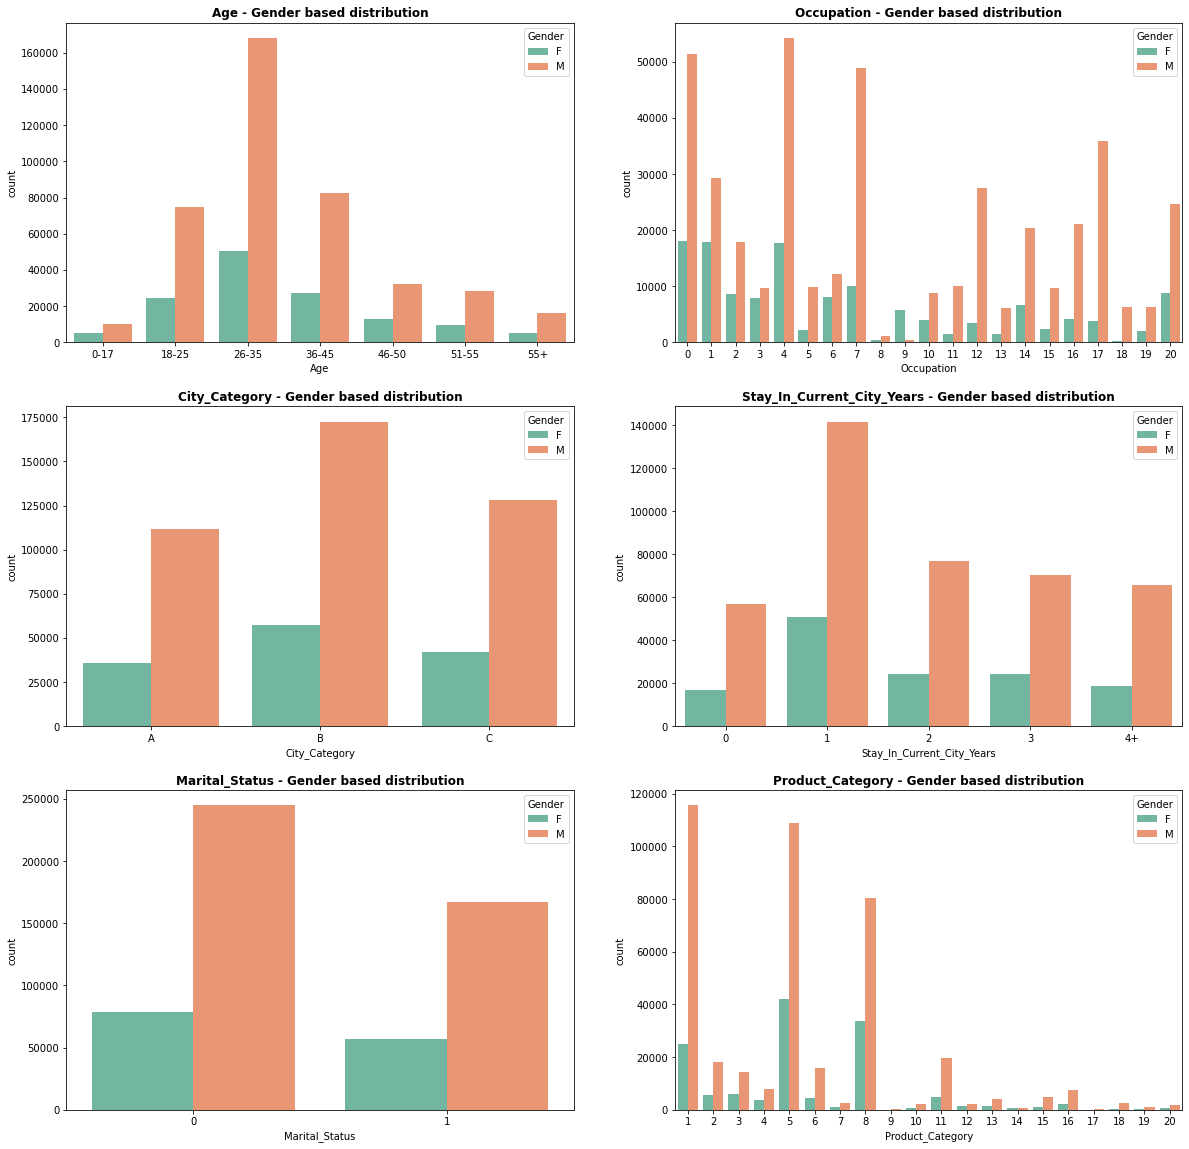

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))

countplot(walmart_data_v1,"Age","Gender",ax[0][0])
countplot(walmart_data_v1,"Occupation","Gender", ax[0][1])

countplot(walmart_data_v1,"City_Category","Gender",ax[1][0])
countplot(walmart_data_v1,"Stay_In_Current_City_Years","Gender", ax[1][1])

countplot(walmart_data_v1,"Marital_Status","Gender",ax[2][0])
countplot(walmart_data_v1,"Product_Category","Gender", ax[2][1])

plt.show()

Inference
* Most of the male customers are from 26-35 age group
* Most of the customers who stays in same city for more than 4 years belongs to 26-35 age group
* Most of the customers who stays in same city just for an year
* Most of the customers from city category group B are male
* Majority of the  customers are male
* Most selling product category - 1,5, 8 and 11 are purchased by male customers

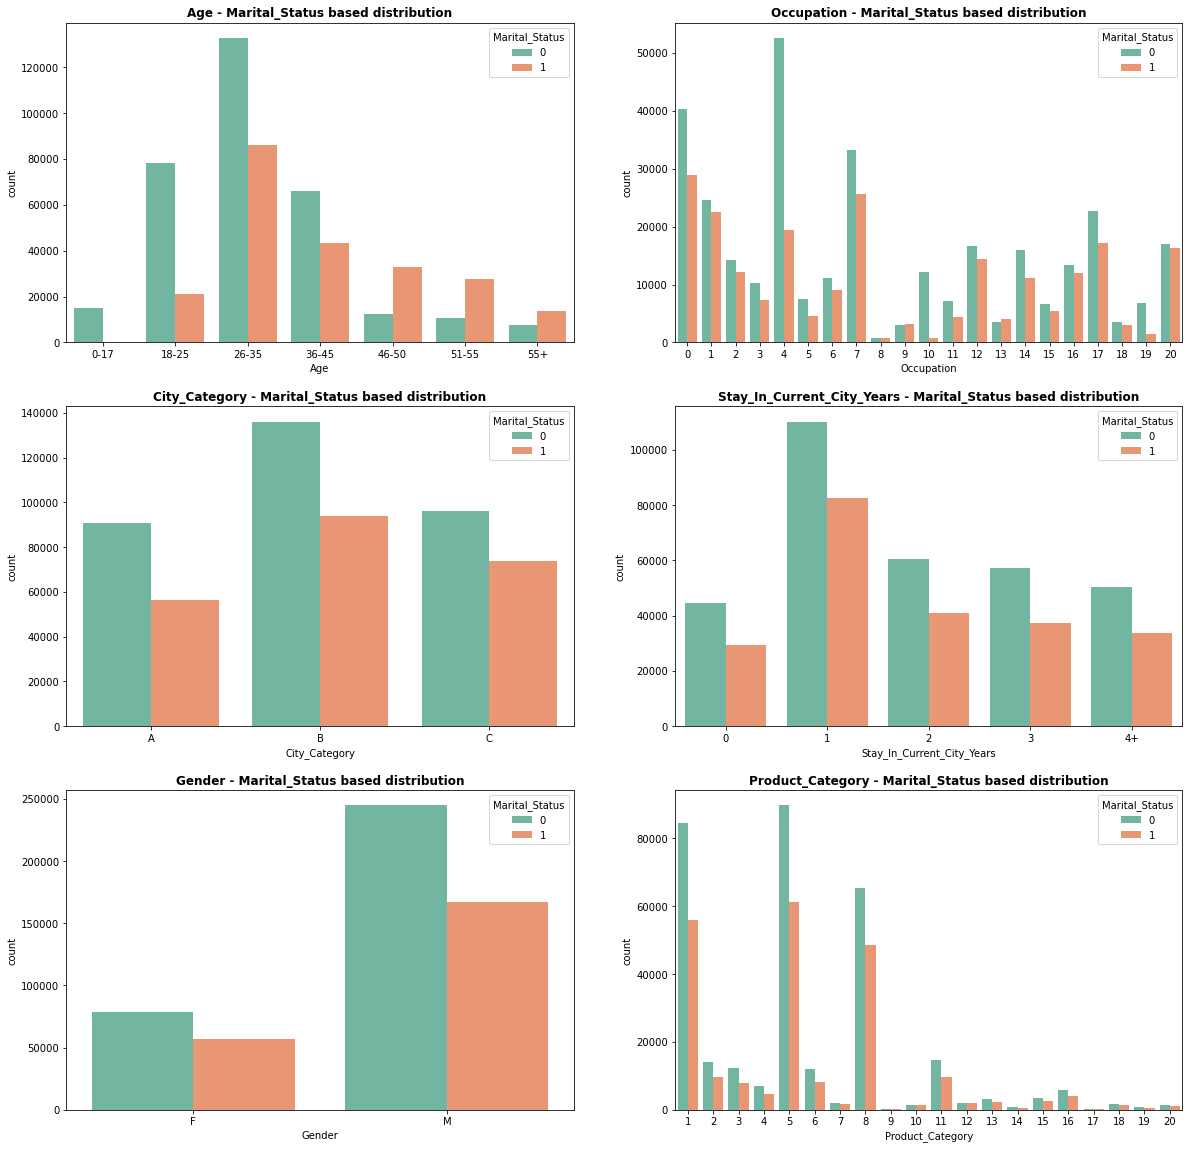

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(20,20))

countplot(walmart_data_v1,"Age","Marital_Status",ax[0][0])
countplot(walmart_data_v1,"Occupation","Marital_Status", ax[0][1])

countplot(walmart_data_v1,"City_Category","Marital_Status",ax[1][0])
countplot(walmart_data_v1,"Stay_In_Current_City_Years","Marital_Status", ax[1][1])

countplot(walmart_data_v1,"Gender","Marital_Status",ax[2][0])
countplot(walmart_data_v1,"Product_Category","Marital_Status", ax[2][1])

plt.show()

Inference
* Male customers purchase more than females.
* 60% of purchases are made by people between the ages of 26 and 45
* 42% customers are from City Category B, whereas 31% are from City Category C 31% and 27% are from City Category A of all customer purchases.
* only 15% of the customers stays in the same city for more than 4 years.
* Single customers purchase more than married.

## Calculate Confidence Interval to estimate the mean of the expenses.
## Use the sample average to find out an interval within which the population average will lie

### Confidence Level : 90%

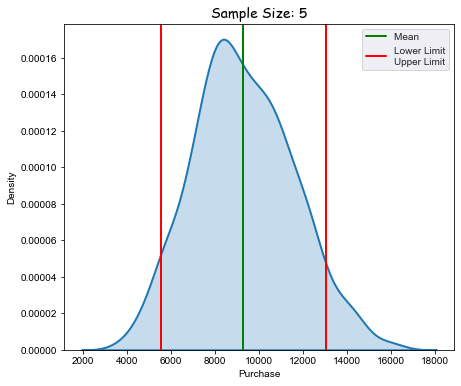

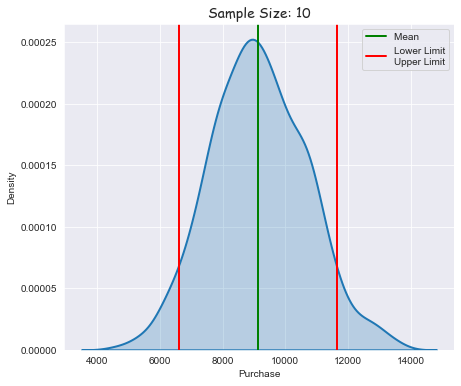

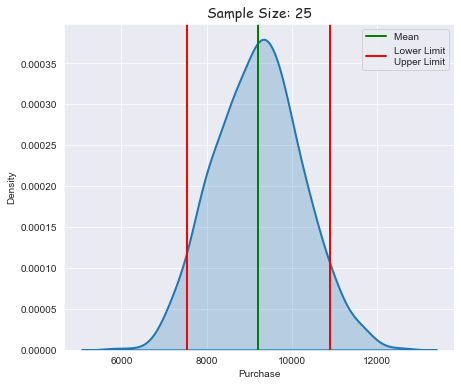

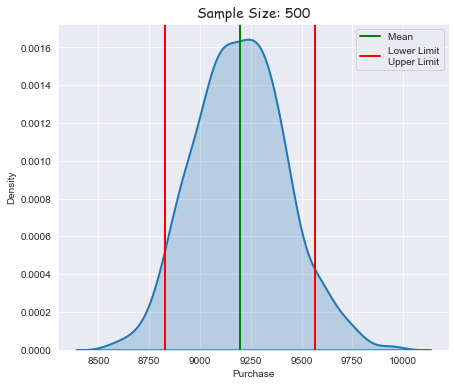

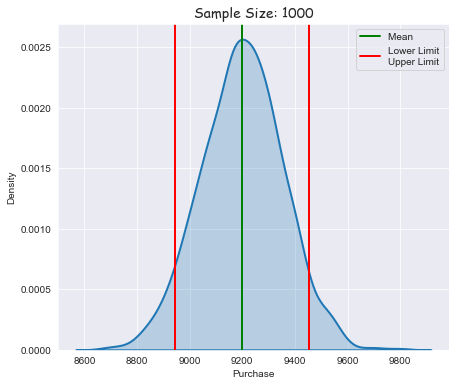

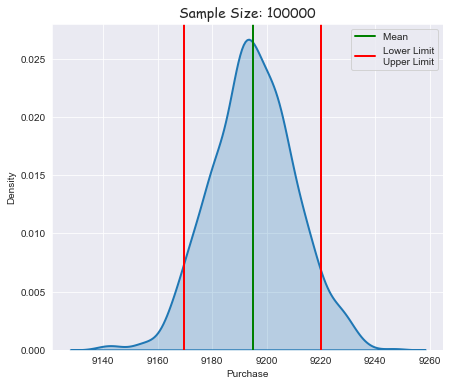

In [ ]:
resarr = CI_kdeplot(walmart_data_v1,0.90)

#### Analysis of true mean of purchase values by gender with a 90% confidence

In [ ]:
CI_90 = pd.DataFrame(resarr, columns = ['Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_90

,Sample_Size,Confidence_pct,Mean,Sigma,Lower_limit,Upper_limit,Range
0,5.0,0.9,9284.18,2284.69,5526.21,13042.16,7515.95
1,10.0,0.9,9138.26,1537.36,6609.54,11666.99,5057.45
2,25.0,0.9,9205.97,1019.70,7528.71,10883.22,3354.52
3,500.0,0.9,9196.44,225.28,8825.89,9566.99,741.11
4,1000.0,0.9,9198.74,154.79,8944.13,9453.34,509.21
5,100000.0,0.9,9194.95,15.27,9169.83,9220.08,50.24


Inference
* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the range of interval decreases
* For  sample size 100000, confidence interval of population mean with confidence percentage 90% is [9170.09,9221.80]

### Confidence Level : 95%

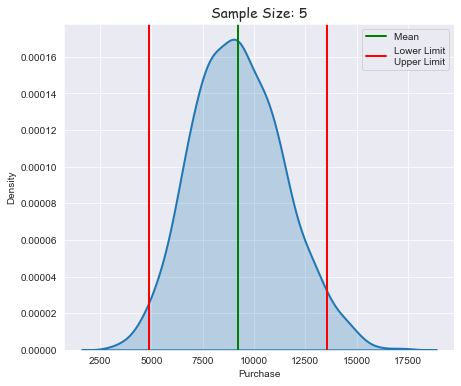

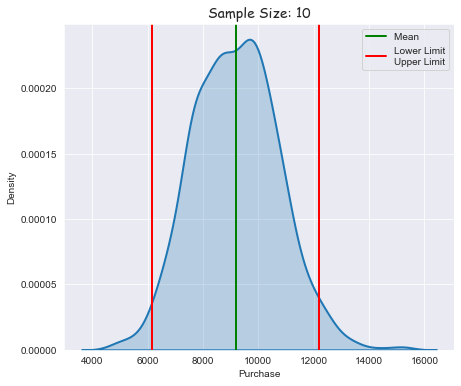

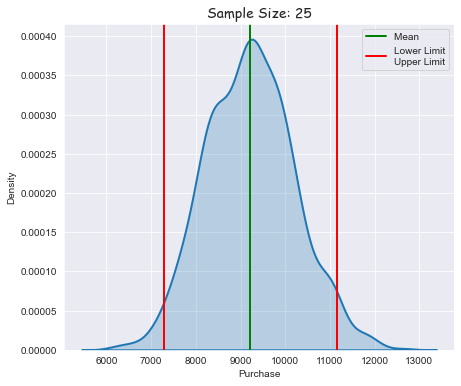

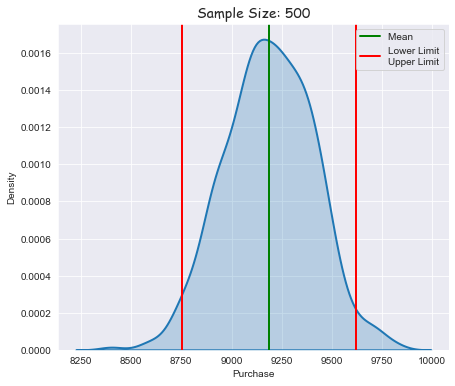

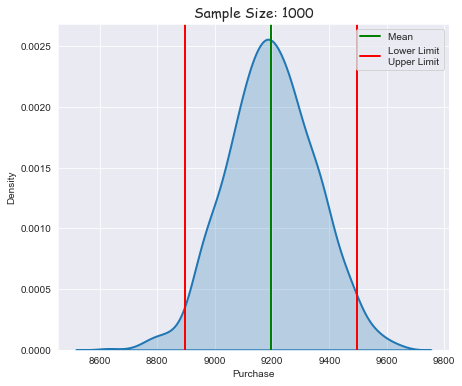

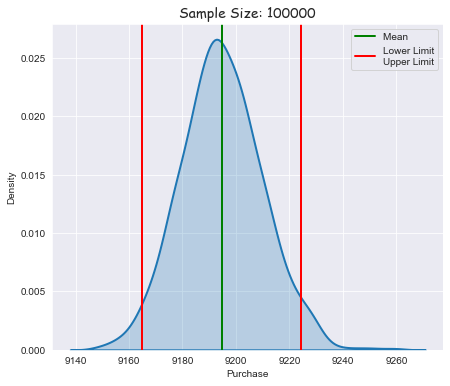

In [ ]:
resarr = CI_kdeplot(walmart_data_v1,0.95)

#### Analysis of true mean of purchase values by gender with a 95% confidence

In [ ]:
CI_95 = pd.DataFrame(resarr, columns = ['Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_95

,Sample_Size,Confidence_pct,Mean,Sigma,Lower_limit,Upper_limit,Range
0,5.0,0.95,9221.96,2206.08,4898.13,13545.80,8647.67
1,10.0,0.95,9176.31,1542.51,6153.05,12199.57,6046.53
2,25.0,0.95,9213.08,987.43,7277.75,11148.42,3870.67
3,500.0,0.95,9185.62,221.66,8751.18,9620.06,868.88
4,1000.0,0.95,9196.35,153.30,8895.89,9496.81,600.92
5,100000.0,0.95,9194.63,15.21,9164.82,9224.45,59.64


Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the range of interval decreases
* For sample size 100000, confidence interval of population mean with confidence percentage 95% is [9164.91,9224.88]

### Confidence Level : 99%

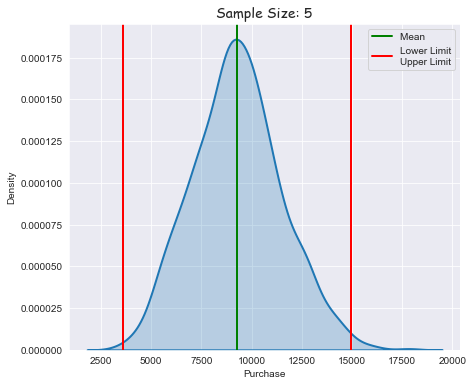

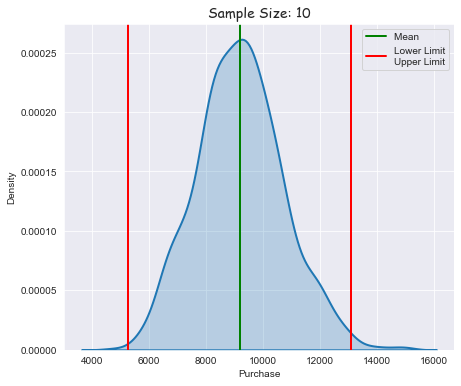

In [ ]:
resarr = CI_kdeplot(walmart_data_v1,0.99)

#### Analysis of true mean of purchase values by gender with a 95% confidence

In [ ]:
CI_99 = pd.DataFrame(resarr, columns = ['Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_99

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the range of interval decreases
* For sample size 100000 , confidence interval of population mean with confidence percentage 99% is [9156.53,9235.07]
* Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.71,59.97,78.54]

## Calculate Confidence Interval to estimate the mean of the expenses by female and male customers.

### Confidence Level : 90%

In [ ]:
resarr = CI_kdeplot_gender(walmart_data_v1,0.90)

#### Analysis of true mean of purchase values by gender with a 90% confidence

In [ ]:
CI_gender_90 = pd.DataFrame(resarr, columns = ['Gender','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_gender_90

Inference
* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9394.12,9394.12]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8695.03,8646.92]

### Confidence Level : 95%

In [ ]:
resarr = CI_kdeplot_gender(walmart_data_v1,0.95)

#### Analysis of true mean of purchase values by gender with a 95% confidence

In [ ]:
CI_gender_95 = pd.DataFrame(resarr, columns = ['Gender','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_gender_95

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9398.6,9335.4]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8698.53,8643.92]
* Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### Confidence Level : 99%

In [ ]:
resarr = CI_kdeplot_gender(walmart_data_v1,0.99)

#### Analysis of true mean of purchase values by gender with a 99% confidence

In [ ]:
CI_gender_99 = pd.DataFrame(resarr, columns = ['Gender','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_gender_99

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9408.32,9327.08]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [8709.62,8632.55]
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. 
* For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [49.68,54.61,77.07]
* For Male Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.47,63.2,81.24]

## Calculate Confidence Interval to estimate the mean of the expenses by Single and Married customers

### Confidence Level : 90%

In [ ]:
resarr = CI_kdeplot_maritalstatus(walmart_data_v1,0.90)

#### Analysis of true mean of purchase values by marital status with a 90% confidence

In [ ]:
CI_maritalstatus_90 = pd.DataFrame(resarr, columns = ['Marital_Status','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_maritalstatus_90

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9175.55,9226.97]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9161.36,9213.92]

### Confidence Level : 95%

In [ ]:
resarr = CI_kdeplot_maritalstatus(walmart_data_v1,0.95)

#### Analysis of true mean of purchase values by marital status with a 95% confidence

In [ ]:
CI_maritalstatus_95 = pd.DataFrame(resarr, columns = ['Marital_Status','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_maritalstatus_95

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9169.6,9233.01]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9155.74,9219.13]
* Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### Confidence Level : 99%

In [ ]:
resarr = CI_kdeplot_maritalstatus(walmart_data_v1,0.99)

#### Analysis of true mean of purchase values by marital status with a 99% confidence

In [ ]:
CI_maritalstatus_99 = pd.DataFrame(resarr, columns = ['Marital_Status','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_maritalstatus_99

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9161.11,9242.91]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9146.41,9226.78]
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. 
* For Single Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.42,63.41,81.79]
* For Married Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.55,63.38,80.37]

## Calculate Confidence Interval to estimate the mean of the expenses by age group.

### Confidence Level : 90%

In [ ]:
resarr = CI_kdeplot_age(walmart_data_v1,0.90)

#### Analysis of true mean of purchase values by age group with a 90% confidence

In [ ]:
CI_agegrp_90 = pd.DataFrame(resarr, columns = ['Age_Group','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_agegrp_90

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Age group 0-17 ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8840.2,8893.25]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9097.56,9149.46]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9167.26,9218.5]
* For Age group 36-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9192.04,9244.54]
* For Age group 51+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9324.82,9375.19]

### Confidence Level : 95%

In [ ]:
resarr = CI_kdeplot_age(walmart_data_v1,0.95)

#### Analysis of true mean of purchase values by age group with a 95% confidence

In [ ]:
CI_agegrp_95 = pd.DataFrame(resarr, columns = ['Age_Group','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_agegrp_95

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Age group 0-17 ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [8836.64,8898.46]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9092.02,9155.38]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9162.1,9225.04]
* For Age group 36-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9186.89,9248.27]
* For Age group 51+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9317.09,9379.82]
* Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### Confidence Level : 99%

In [ ]:
resarr = CI_kdeplot_age(walmart_data_v1,0.99)

#### Analysis of true mean of purchase values by age group with a 99% confidence

In [ ]:
CI_agegrp_99 = pd.DataFrame(resarr, columns = ['Age_Group','Sample_Size','Confidence_pct','Mean','Sigma','Lower_limit','Upper_limit','Range'])
CI_agegrp_99

Inference

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* For Age group 0-17 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [8827.6,8907.98]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9081.54,9166.36]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9155.09,9233.73]
* For Age group 36-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9177.48,9257.32]
* For Age group 51+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9309.67,9388.93]
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. 
* For Age group 0-17 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [53.76,59.78,80.38]
* For Age group 18-25 Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.2,60.06,814.83]
* For Age group 26-35 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.96,59.71,78.63]
* For Age group 36-45 Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.2,61.45,75.98]
* For Age group 46-50 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [49.85,60.05,81.65]
* For Age group 51-55 Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.82,59.63,79.35]
* For Age group 55+ customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.22,60.18,77.32]

## Business Insights

### Are women spending more money per transaction than men? Why or Why not?
* Male customers purchase more than females. 75% of men and only 25% of women purchase products.
* The amount of money spent by women is less than that spent by men
* In City Category C, there are slightly more female customers.
* Occupation 19 female customers spend more than male customers
* Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

### Based on EDA
* Male customers tend to spend more than female customers, as the mean is higher for male customers.
* Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.
* Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45
* 58% are married customers
* Majority of customers come from City Category B tend to purchase more than other category group customers
* The majority of the customers come from city category B but customers come from City category C spent more as mean .
* The users come from City Category C spent more
* 60% of purchases are made by people between the ages of 26 and 45
* 42% customers are from City Category B, whereas 31% are from City Category C 31% and 27% are from City Category A of all customer purchases.
* only 15% of the customers stays in the same city for more than 4 years.
* In City Category C, there are slightly more female customers.
* Majority of Customers purchase within the 5,000 - 20,000 range.
* Most of the customers who stays in same city just for an year
* Most selling product category - 1,5, 8 and 11 are purchased by male customers

### Use the sample average to find out an interval within which the population average will lie

* For sample size 100000, confidence interval of population mean with confidence percentage 90% is [9170.09,9221.80]
* For sample size 100000, confidence interval of population mean with confidence percentage 95% is [9164.91,9224.88]
* For sample size 100000 , confidence interval of population mean with confidence percentage 99% is [9156.53,9235.07]
* Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.71,59.97,78.54]

### Confidence intervals and distribution of the mean of the expenses by female and male customers
* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases.
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9408.32,9327.08]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8709.62,8632.55]
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9398.6,9335.4]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8698.53,8643.92]
* For Male customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9408.32,9327.08]
* For Female customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8709.62,8632.55]
* For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [49.68,54.61,77.07]
* For Male Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.47,63.2,81.24]
* Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
* Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### Are confidence intervals of average male and female spending overlapping? 
Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range

### How can Walmart leverage this conclusion to make changes or improvements?
Females spend less than males on average, management needs to focus on their specific needs differently. 
Adding some additional offers for women can increase their spending on Black Friday.

### Confidence intervals and distribution of the mean of the expenses by single and marrried customers

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases.
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9175.55,9226.97]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [9161.36,9213.92]
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9169.6,9233.01]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9155.74,9219.13]
* For Single customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9161.11,9242.91]
* For Married customers( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9146.41,9226.78]
* For Single Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.42,63.41,81.79]
* For Married Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.55,63.38,80.37]
* Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married

### Confidence intervals and distribution of the mean of the expenses by different age group customers

* As the sample size increases, standard error of the sample mean decreases
* As the sample size increases, the two groups start to become distinct
* As the sample size increases, the range of interval decreases
* When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases.
* For Age group 0-17 ( sample size 100000 ), confidence interval of population mean with confidence percentage 90% is [8840.2,8893.25]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9097.56,9149.46]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9167.26,9218.5]
* For Age group 36-45 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9229.31,9278.5]
* For Age group 46-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9104.93,9155.14]
* For Age group 51-55 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9398.5,9449.52]
* For Age group 55+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9191.11,9242.12]
* For Age group 0-17 ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [8836.64,8898.46]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9092.02,9155.38]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9162.1,9225.04]
* For Age group 36-45 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9223.38,9285.07]
* For Age group 46-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9099.66,9159.05]
* For Age group 51-55 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9392.17,9453.88]
* For Age group 55+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 95% is [9187.42,9246.75]
* For Age group 0-17 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [8827.6,8907.98]
* For Age group 18-25 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9081.54,9166.36]
* For Age group 26-35 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9155.09,9233.73]
* For Age group 36-45 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9216.71,9292.69]
* For Age group 46-50 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9088.1,9169.75]
* For Age group 51-55 customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9383.37,9462.73]
* For Age group 55+ customers ( sample size 100000 ), confidence interval of population mean with confidence percentage 99% is [9177.46,9254.78]
* For Age group 0-17 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [53.76,59.78,80.38]
* For Age group 18-25 Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.2,60.06,814.83]
* For Age group 26-35 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.96,59.71,78.63]
* For Age group 36-45 Confidence percent as [90,95,99] have difference between the upper & lower limits as [52.2,61.45,75.98]
* For Age group 46-50 customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [49.85,60.05,81.65]
* For Age group 51-55 Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.82,59.63,79.35]
* For Age group 55+ customers Confidence percent as [90,95,99] have difference between the upper & lower limits as [51.22,60.18,77.32]
* Spending by Age_group 0-17 is low compared to other age groups.

# Recommendations

On an average, males spend more than females. Walmart needs to focus on their specific needs differently. Adding some attrractive products and some additional offers for women can increase their spending on Black Friday.
To attract youth customers, 
    Walmart should come-up with some attractive games which will can help them to increase the sale. 
    Also have some additional offers for kids in order to increase the sales
    Walmart should also come-up with attractive products for young generation customers